# Evolutionary computing


## 1+1 Evolution Strategy (ES) with a constant mutation strength

In computer science, an evolution strategy (ES) is an optimization technique based on ideas of evolution. It belongs to the general class of evolutionary computation or artificial evolution methodologies. (Wikipedia [1])

[1]: https://en.wikipedia.org/wiki/Evolution_strategy

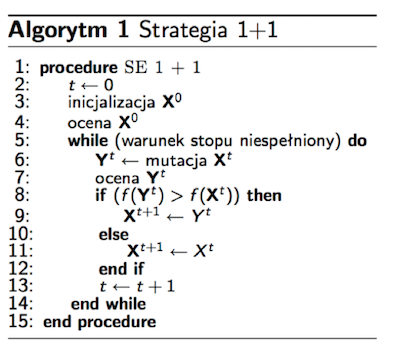

Using ES 1+1 *optimize* (here find the **minimum** of a) function sin(10x)x + cos(2x)x 

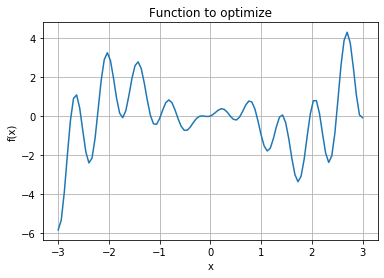

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

#function to optimize
def fnc(x):
    return np.sin(10*x)*x + np.cos(2*x)*x

search_box=(-3, 3) #*dim

xx=np.linspace(search_box[0], search_box[1], 100)
yy=fnc(xx)

plt.plot(xx,yy)
plt.title("Function to optimize")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

In [2]:
t=0 #init iteration

dim=1
max_iter=40
sigma=0.6 #mutation strenght

x0 = np.random.randn(dim)
x=x0.copy() #keep copy of initial solution for plotting

end = False

#optimization by evolution of the *simples* kind
while not end:
    y=x+sigma*np.random.randn(dim) # simple mutation
    if fnc(y) < fnc(x):
        x=y
    t=t+1
   
    if t == max_iter:
        end = True
        
print("Found solution at {} with value {}".format(x, fnc(x)) )

Found solution at [-0.46915152] with value [-0.74639179]


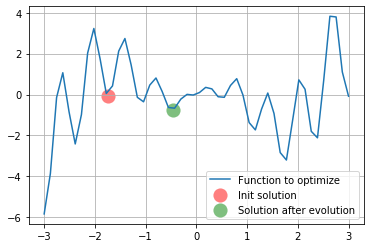

In [3]:
#plotting results
xx=np.linspace(search_box[0], search_box[1], 50)
yy=fnc(xx)

plt.plot(xx,yy)
plt.scatter(x0,fnc(x0),s=200, lw=0, c='red', alpha=0.5)
plt.scatter(x,fnc(x),s=200, lw=0, c='green', alpha=0.5)
plt.legend(["Function to optimize", "Init solution", "Solution after evolution"])
plt.grid()

## 1+1 Evolution Strategy (ES) with an adaptive mutation strength
Mutation strength can be adjust with so called 1/5th success rule
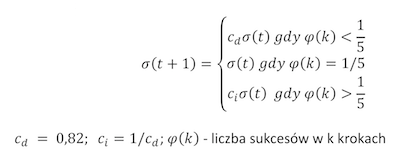

In [4]:
# Implementa 1/5th success rule to adaptive adjust mutation strength
np.random.seed(100)

t=0 #init iteration

dim=1
max_iter=20
sigma=0.35 #mutation strenght
#search_box=(-3, 3) #*dim
x0 = np.random.randn(dim)
x=x0.copy() #keep copy of initial solution for plotting

end = False

#function to optimize
def fnc(x):
    return np.sin(10*x)*x + np.cos(2*x)*x

sucess=1
fail=1
cd=0.82
ci=1/cd

#optimization by evolution of the *simples* kind
while not end:
    y=x+sigma*np.random.randn(dim) # simple mutation
    
    if fnc(y) < fnc(x):
        x=y
        sucess=sucess+1
    else:
        fail=fail+1
    
    if sucess/fail < 1/5:
        sigma = cd*sigma
    elif sucess/fail > 1/5:
        sigma = ci*sigma

    t=t+1
    if t == max_iter:
        end = True
        
print("Found solution at {} with value {}".format(x, fnc(x)) )

Found solution at [-2.94682783] with value [-5.46611662]


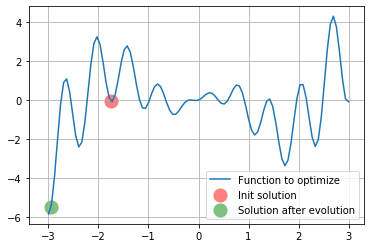

In [5]:
#plotting results
xx=np.linspace(search_box[0], search_box[1], 100)
yy=fnc(xx)

plt.plot(xx,yy)
plt.scatter(x0,fnc(x0),s=200, lw=0, c='red', alpha=0.5)
plt.scatter(x, fnc(x),s=200, lw=0, c='green', alpha=0.5)
plt.legend(["Function to optimize", "Init solution", "Solution after evolution"])
plt.grid()
plt.show()

### Optimization of a Rastrigin and an Ackley test functions
* Rastrigin function [2]
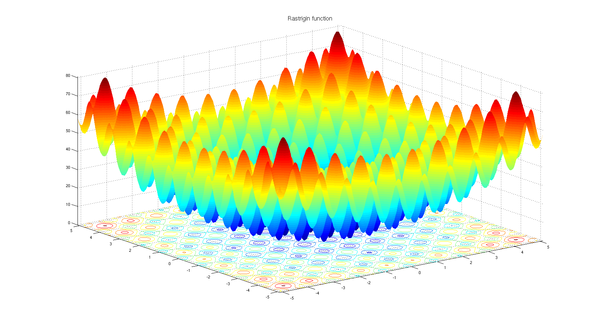
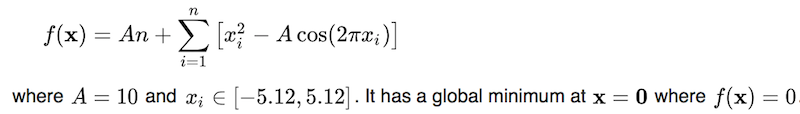
* Ackley function [3]
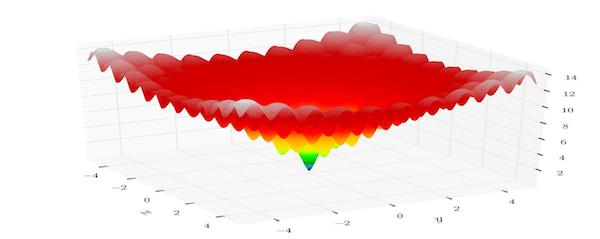
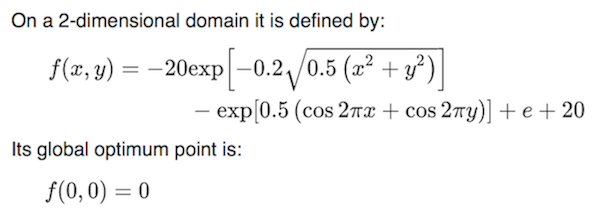

Consider other well known test function at https://en.wikipedia.org/wiki/Test_functions_for_optimization

[2]: https://en.wikipedia.org/wiki/Rastrigin_function
[3]: https://en.wikipedia.org/wiki/Ackley_function

In [18]:
#TODO: Optimize Ackley and Rastrigin function with ES 1+1

def Rastrigin_fnc(x, y):
    return (y**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y)) + 20

t=0 

dim = 1
max_iter = 500000
sigma = 0.6 


x0 = sigma * np.random.randn(dim)
x0_copy = np.copy(x0)

y0 = sigma * np.random.randn(dim)
y0_copy = np.copy(y0)

end = False

while not end:
    x0 = x0_copy+sigma*np.random.randn(dim)
    y0 = y0_copy+sigma*np.random.randn(dim)
    
    if rastrigin_fnc(x0,y0) < Rastrigin_fnc(x0_copy,y0_copy):
        print("Replace x {} with {}".format(x0_copy, x0))
        print("Replace y {} with {}".format(y0_copy, y0))
        print("Value :{}".format(Ackley_fnc(x0_copy,y0_copy)))

        x0_copy=x0
        y0_copy=y0
    t=t+1
   
    if t == max_iter:
        end = True
        
print("Found solution at x = {}, y = {} with value {}".format(x0_copy, y0_copy, Rastrigin_fnc(x0_copy,y0_copy)) )

Replace x [-0.93164645] with [-0.98578569]
Replace y [0.84840857] with [0.95995162]
Value :[2.98086816]
Replace x [-0.98578569] with [-0.96575111]
Replace y [0.95995162] with [-0.0593691]
Value :[2.61879005]
Replace x [-0.96575111] with [-0.99969701]
Replace y [-0.0593691] with [0.05270709]
Value :[1.96647225]
Replace x [-0.99969701] with [-0.97738992]
Replace y [0.05270709] with [0.02063173]
Value :[1.97807565]
Replace x [-0.97738992] with [-1.021304]
Replace y [0.02063173] with [-0.01687777]
Value :[1.88766391]
Replace x [-1.021304] with [-1.02065898]
Replace y [-0.01687777] with [0.00386825]
Value :[1.96173716]
Replace x [-1.02065898] with [-0.99170379]
Replace y [0.00386825] with [0.01068579]
Value :[1.95242213]
Replace x [-0.99170379] with [-0.99662926]
Replace y [0.01068579] with [-0.00740355]
Value :[1.89324018]
Replace x [-0.99662926] with [-0.99597678]
Replace y [-0.00740355] with [-0.00294599]
Value :[1.89897494]
Replace x [-0.99597678] with [0.00342303]
Replace y [-0.0029459

In [19]:
from numpy import pi, cos, exp


def Ackley_fnc(x, y):
    a = 20
    b = 0.2
    c = 2*pi
    
    suma1 = x**2 + y**2 
    suma2 = cos(c*x) + cos(c*y)
    wyr1 = - a * exp(-b * ((1/2.) * suma1**(0.5)))
    wyr2 = - exp((1/2.)*suma2)

    wynik = wyr1 + wyr2 + a + exp(1)
    return wynik

t=0 

dim = 1 
max_iter = 500000
sigma = 0.6 


x0 = sigma * np.random.randn(dim)
x0_copy = np.copy(x0)

y0 = sigma * np.random.randn(dim)
y0_copy = np.copy(y0)

end = False

while not end:
    x0 = x0_copy+sigma*np.random.randn(dim)
    y0 = y0_copy+sigma*np.random.randn(dim)
    
    if Ackley_fnc(x0,y0) < Ackley_fnc(x0_copy,y0_copy):
        print("Replace x {} with {}".format(x0_copy, x0))
        print("Replace y {} with {}".format(y0_copy, y0))
        print("Value :{}".format(Ackley_fnc(x0_copy,y0_copy)))
        x0_copy=x0
        y0_copy=y0
    t=t+1
   
    if t == max_iter:
        end = True
        
print("Found solution at x = {}, y = {} with value {}".format(x0_copy, y0_copy, Ackley_fnc(x0_copy,y0_copy)) )

Replace x [-0.44497956] with [-0.9257097]
Replace y [-0.63378438] with [0.96128233]
Value :[3.76105697]
Replace x [-0.9257097] with [-0.33552832]
Replace y [0.96128233] with [-0.17230956]
Value :[2.67788393]
Replace x [-0.33552832] with [-0.24649097]
Replace y [-0.17230956] with [-0.1669118]
Value :[2.47983148]
Replace x [-0.24649097] with [-0.27493207]
Replace y [-0.1669118] with [-0.03735992]
Value :[2.00748904]
Replace x [-0.27493207] with [-0.26239578]
Replace y [-0.03735992] with [-0.00546727]
Value :[1.761342]
Replace x [-0.26239578] with [0.04174682]
Replace y [-0.00546727] with [-0.17692259]
Value :[1.65101425]
Replace x [0.04174682] with [-0.04697892]
Replace y [-0.17692259] with [0.01129429]
Value :[1.05573519]
Replace x [-0.04697892] with [0.01015602]
Replace y [0.01129429] with [0.00624896]
Value :[0.15789844]
Replace x [0.01015602] with [0.00691317]
Replace y [0.00624896] with [-0.00556425]
Value :[0.02764591]
Replace x [0.00691317] with [0.00091635]
Replace y [-0.00556425

## Differential Evolution (DE)
Differential evolution process [4]
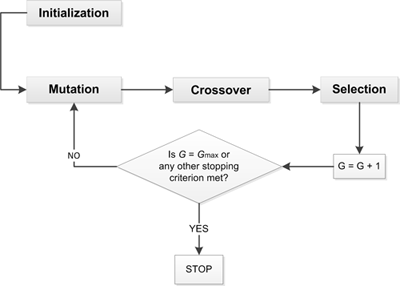
One iteration af a Differential Evolution (DE) [5]
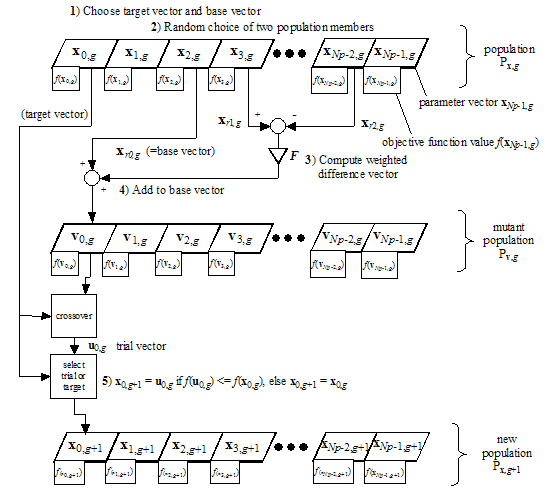
Mutation and crossover operators [6]
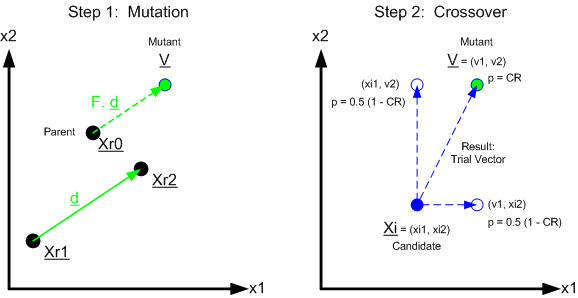
Example of a Differential Evolution optimizing Ackley function [7]
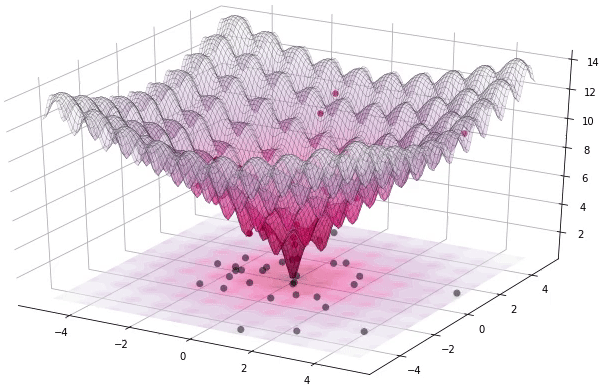

[4]: http://georgioudakis.com/blog/optimization/de.html
[5]: http://www1.icsi.berkeley.edu/~storn/code.html
[6]: https://www.raynergobran.com/2011/04/differential-evolution-optimization/
[7]: https://en.wikipedia.org/wiki/Differential_evolution

More information on DE can be found at https://www.sciencedirect.com/science/article/pii/S0308521X04000745

### The Rosenbrock function optimization with DE

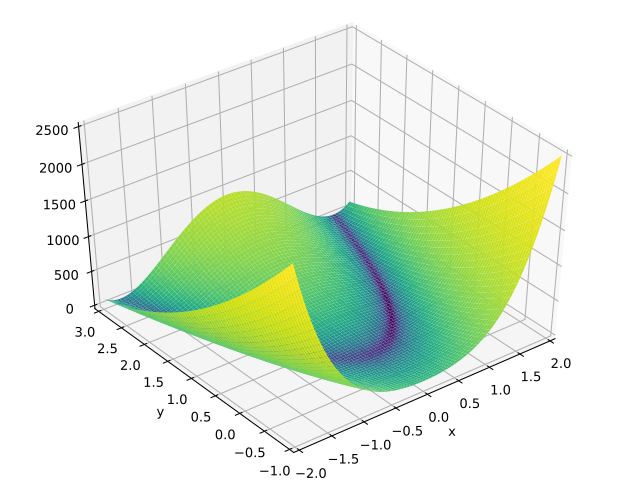

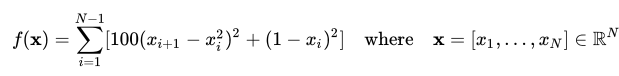

Using [differential_evolution()](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.optimize.differential_evolution.html) class

In [21]:
from scipy.optimize import rosen, differential_evolution
bounds = [(-2,2), (-2, 2), (-2, 2), (-2, 2), (-2, 2)]
result = differential_evolution(rosen, bounds, 
                                maxiter=1000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7)

print("Found solution at {} with value {}".format(result.x, result.fun))

Found solution at [1. 1. 1. 1. 1.] with value 0.0


In [30]:
#TODO: Optimize Ackley and Rastrigin function using DE
def Rastrigin_fnc(x):
    return (x[1]**2 - 10 * np.cos(2 * np.pi * x[0])) + (x[1]**2 - 10 * np.cos(2 * np.pi * x[1])) + 20

bounds = [(-5.12, 5.12), (-5.12, 5.12)]

result = differential_evolution(Rastrigin_fnc, bounds, maxiter=100, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7)

print("Found solution at {} with value {}".format(result.x, result.fun))

Found solution at [2.00000000e+00 4.33076366e-10] with value 0.0


In [31]:
import math

def Ackley_fnc(x):
    a = 20
    b = 0.2
    c = 2*pi
    
    xx=x[0]
    y=x[1]
    
    suma1 = xx**2 + y**2 
    suma2 = cos(c*xx) + cos(c*y)
    wyr1 = - a * exp(-b * ((1/2.) * suma1**(0.5)))
    wyr2 = - exp((1/2.)*suma2)

    wynik = wyr1 + wyr2 + a + exp(1)
    return wynik

bounds = [(-5, 5), (-5, 5)]

result = differential_evolution(Ackley_fnc, bounds, maxiter=100, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7)

print("Found solution at {} with value {}".format(result.x,result.fun))

Found solution at [0. 0.] with value 4.440892098500626e-16


### Evolutionary learning polynomial function to model data with DE
Problem: Having set of data we want to find a function to best model the data

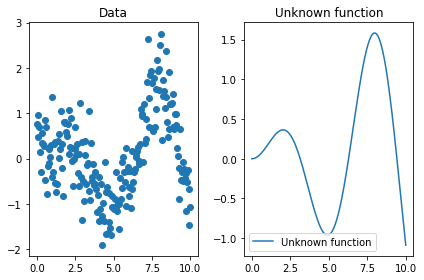

In [9]:
def unknown_function(x):
    return np.sin(x)*x/5

sample_number = 200
data = np.linspace(0, 10, sample_number)
target =  unknown_function(data)+ np.random.normal(0,0.5,sample_number)

plt.subplot('121')
plt.scatter(data, target)
plt.title('Data')
plt.subplot('122')
plt.plot(data, unknown_function(data), label='Unknown function')
plt.title('Unknown function')
plt.legend()
plt.tight_layout()

In [10]:
#polynomial function to model data
def data_model(x, theta):
    return theta[0] + theta[1] * x + theta[2] * x ** 2 + theta[3] * x ** 3 + theta[4] * x ** 4 + theta[5] * x ** 5

def mse(theta):
    target_pred = data_model(data, theta)
    return np.sqrt(sum((target - target_pred)**2) / len(target))

#for drawing
results_ = list()
def current_solution(curr_, convergence):
    results_.append(curr_)
#---

search_box=[(-5,5)]*6
result = differential_evolution(mse, search_box,
                                maxiter=1000, popsize=25, tol=1e-10, atol=1e-10, mutation=(0.5, 1), recombination=0.7,
                               callback=current_solution, #callback for drawing
                               )

print("Model parameters: {0}, with error {1}".format(result.x, result.fun))

Model parameters: [ 0.04892726  0.73191636 -0.38679899  0.00895892  0.0109285  -0.00088849], with error 0.5706863467956991


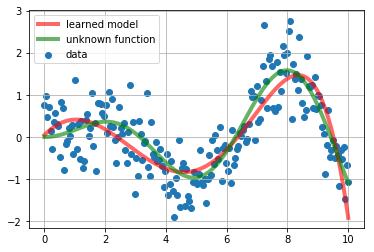

In [11]:
plt.figure(2)
plt.scatter(data, target, label='data')
plt.plot(data, data_model(data, result.x), c='red', lw=4, alpha=0.6, label='learned model')
plt.plot(data, unknown_function(data), c='green', lw=4, alpha=0.6, label='unknown function')
plt.grid()
plt.legend()

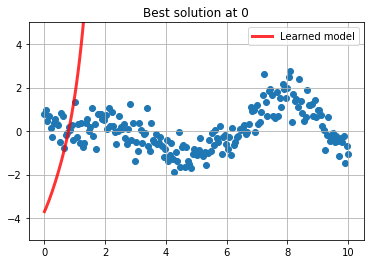

In [12]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.set_ylim([-5, 5])
    ax.scatter(data, target)
    target_ = data_model(data, results_[i])
    ax.plot(data, target_, alpha=0.8, lw=3, c='red', label='Learned model')
    title = "Best solution at "+str(i)
    ax.set_title(title)
    ax.grid()
    ax.legend()

anim = animation.FuncAnimation(fig, animate, frames=len(results_), interval=40)
HTML(anim.to_html5_video())

## Additional reading materials
1. Neuroevolution: A different kind of deep learning https://www.oreilly.com/ideas/neuroevolution-a-different-kind-of-deep-learning
2. Uber on NeuroEvolution https://eng.uber.com/deep-neuroevolution/
3. Evolution Strategies as a Scalable Alternative to Reinforcement Learning https://blog.openai.com/evolution-strategies/